In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr



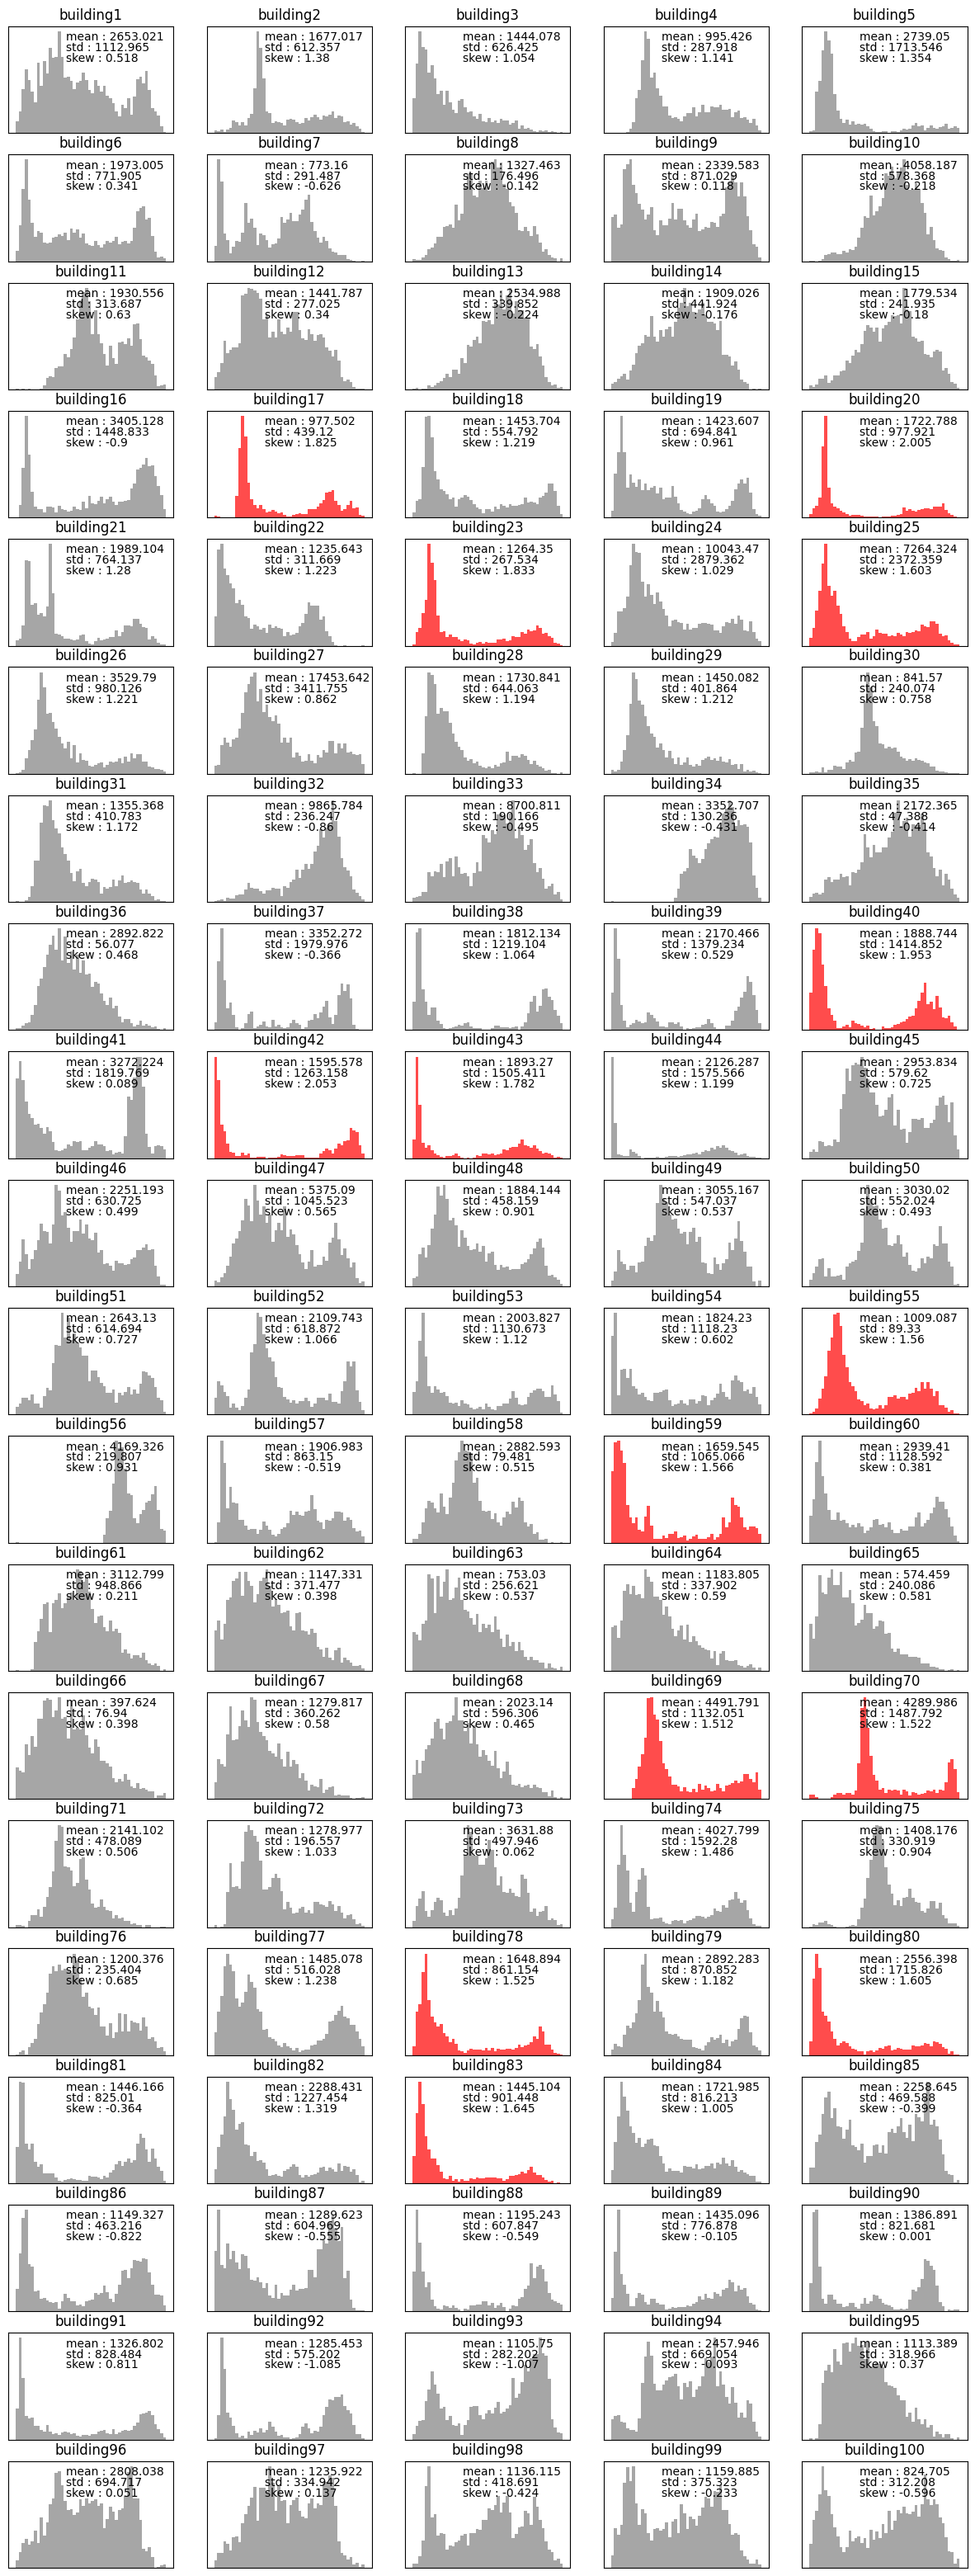

In [9]:

fig = plt.figure(figsize = (15, 40))
for num in range(1,101):
    eda_df = pd.read_csv(f'./split/train_building{num}.csv')
    ax = plt.subplot(20, 5, num)
    energy = eda_df['power_consumption'].values
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

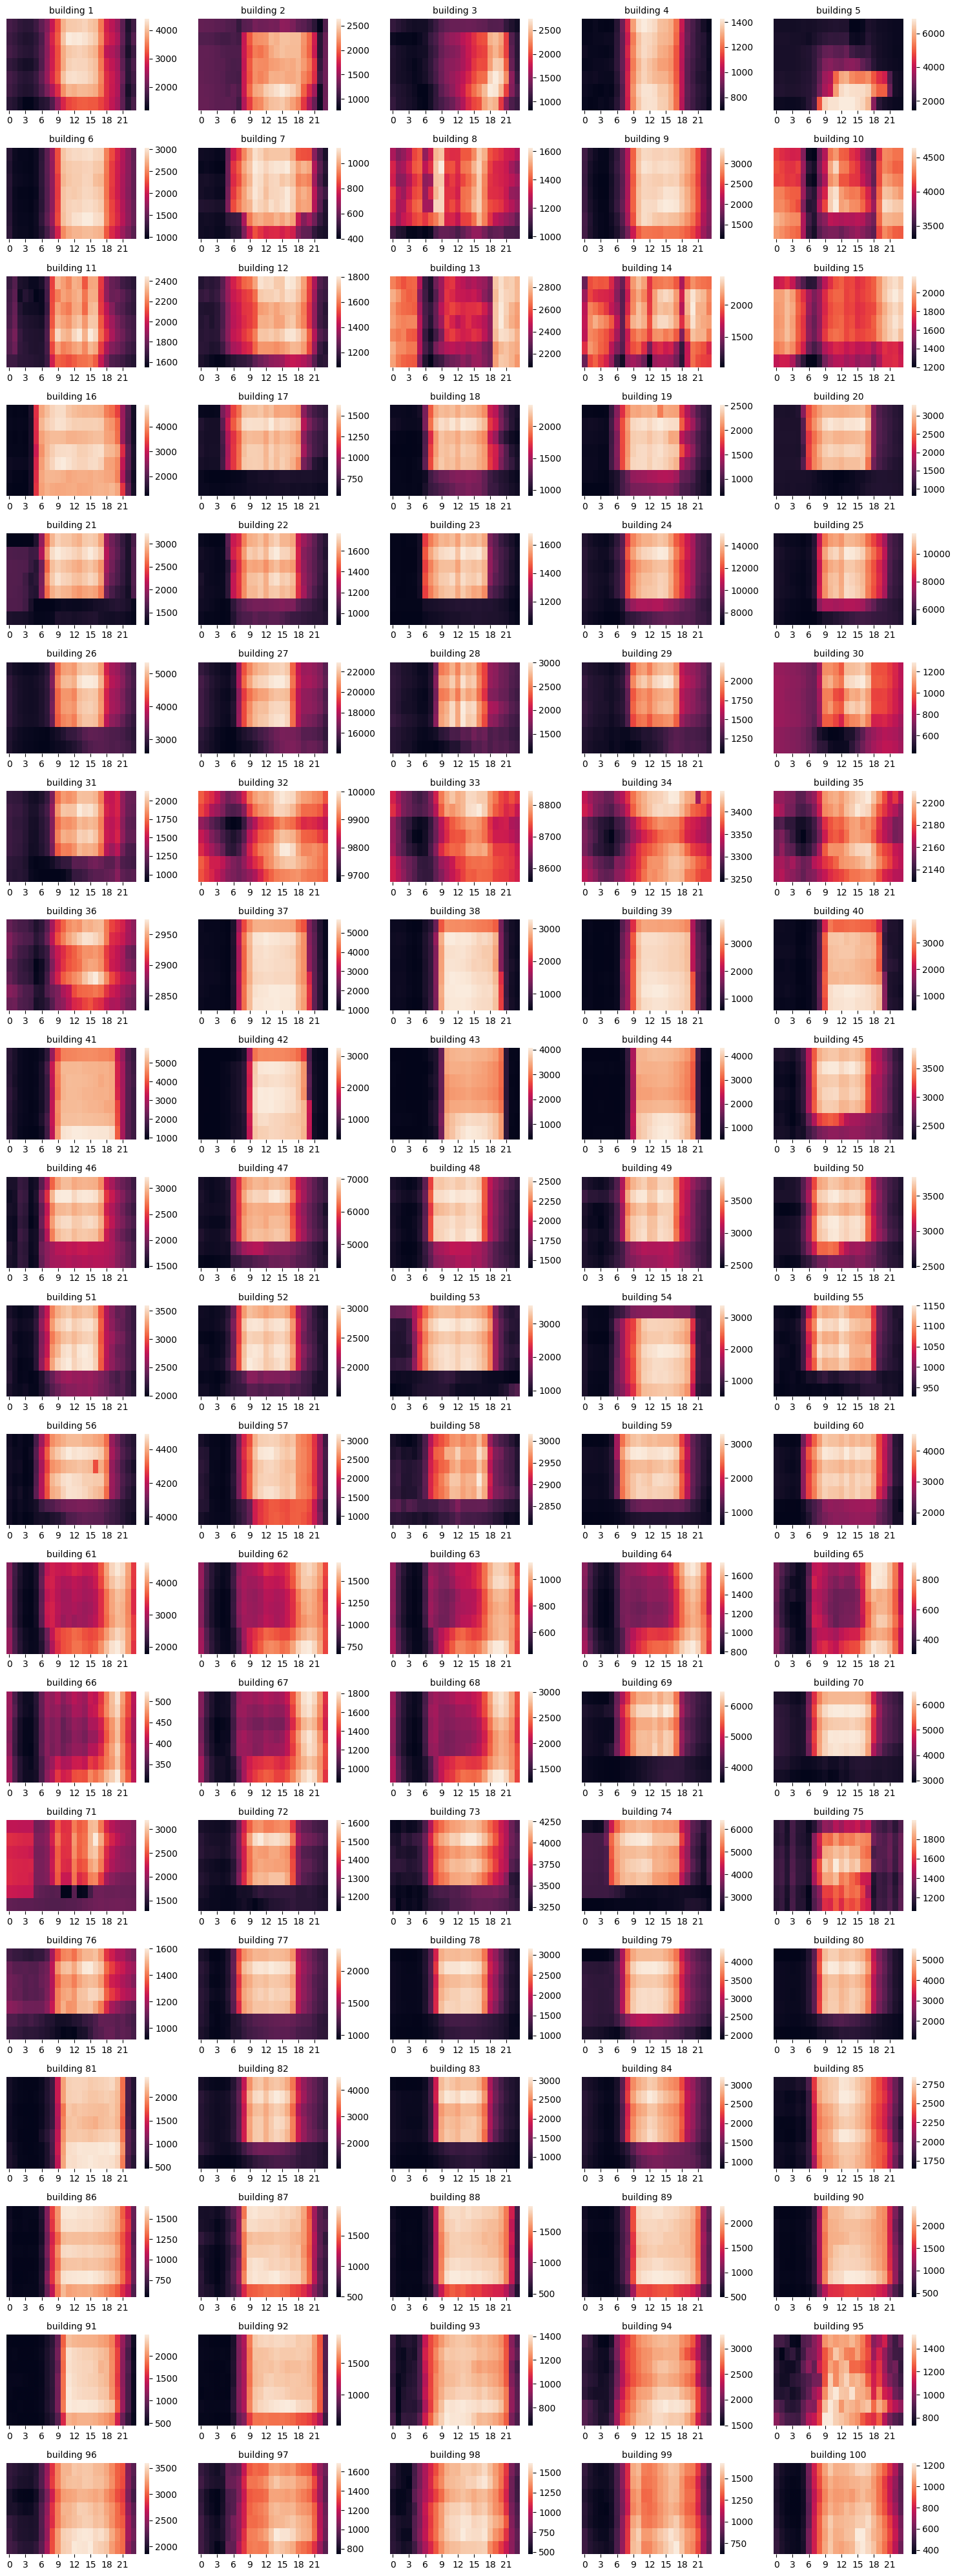

In [1]:
import numpy as np
import pandas as pd
# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for i in np.arange(1,101,1):
    train_df = pd.read_csv(f'./submit/train_building{i}.csv').drop(columns=['Unnamed: 0'])
    
    train_df = train_df.groupby(['day', 'hour'])['power_consumption'].mean().reset_index().pivot(index='day', columns='hour', values='power_consumption')

    plt.subplot(20, 5, i)
    sns.heatmap(train_df)
    plt.title(f'building {i}',fontsize = 10)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
plt.tight_layout()
plt.show()